# [Problem 1 to 6]

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [103]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        number_of_features = X.shape[1]
        self.best_gain = 0
        for i in range(number_of_features):
            candidate_threshold = np.unique(X[:,i])
            
            for threshold in candidate_threshold:
                left = y[X[:,i] < threshold]
                right = y[X[:,i] >= threshold]
                
                split_info_gain = self._information_gain(y,left,right)
                
                if split_info_gain > self.best_gain:
                    self.left_label = statistics.mode(left)
                    self.right_label = statistics.mode(right)
                    self.threshold = threshold
                    self.feature_chosen = i
                    self.best_gain = split_info_gain
                    
                    if self.verbose:
                        print("feature: {}, information_gain: {}".format(self.feature_chosen,self.best_gain))
        
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        return np.where(X[:,self.feature_chosen] < self.threshold,self.left_label,self.right_label)
    
    def _gini(self,node):
        """
        Function to calculate gini impurity of a node
        Parameters
        -------
        node: nd_array shape(n_smaples,1)
        Output
        --------
        Gini impurity of a node
        """
        samples,counts = np.unique(node, return_counts=True)
        result = 1
        node_count = len(node)
        for count in counts:
            result -= (count / node_count)**2
        return result
    
    def _information_gain(self, parent, left, right):
        """
        Calculate information gain of a specific division using gini impurity
        Parameters
        ---------
        parent, left,right: parent, left, right node of the split, ndarray shape (number_of_samples,1)
        Output
        ---------
        Information gain of the division
        """
        parent_gini = self._gini(parent)
        left_gini = (self._gini(left) * len(left)) / len(parent)
        right_gini = (self._gini(right) * len(right)) / len(parent)
        return parent_gini - left_gini - right_gini

In [104]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<AxesSubplot:>

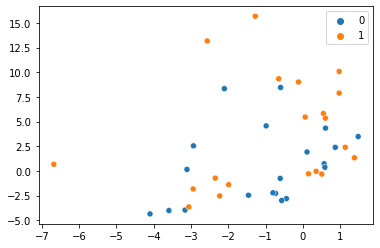

In [105]:
# Visualize data distribution
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

**Learning and estimation using the scratch class**

In [106]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size =0.75)

In [107]:
model = ScratchDecesionTreeClassifierDepth1(verbose=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

feature: 0, information_gain: 0.01501915708812257
feature: 0, information_gain: 0.020992063492063423
feature: 0, information_gain: 0.03865258924082446
feature: 0, information_gain: 0.06259259259259262
feature: 0, information_gain: 0.09395002658160546
feature: 1, information_gain: 0.12126262626262618
[0 1 1 0 1 1 1 0 1 1]


In [143]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate(y_pred, y_test):
  print("accuracy: {}".format(accuracy_score(y_test,y_pred)))
  print("precision: {}".format(precision_score(y_test,y_pred)))
  print("recall: {}".format(recall_score(y_test,y_pred)))
  print("f1: {}".format(f1_score(y_test,y_pred)))

In [144]:
evaluate(y_pred,y_test)

accuracy: 0.3
precision: 0.2857142857142857
recall: 0.5
f1: 0.36363636363636365


In [12]:
# Skcit-learn implementation with depth 1
from sklearn.tree import DecisionTreeClassifier
model_sk = DecisionTreeClassifier(max_depth=1)
model_sk.fit(X_train,y_train)
y_pred_sk = model_sk.predict(X_test)
evaluate(y_pred_sk,y_test)

accuracy: 0.3
precision: 0.2857142857142857
recall: 0.5
f1: 0.36363636363636365


As can be seen from above output, there is no difference between the result generated from scratch model and model imported from sklearn. Since max_depth hyperparameter is set to 1, the performance of skcit-learn model is the same with our model. Both perform not well as the trees generated only branch once.

In [13]:
# Visualizing decision area
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['1', '-1']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'green']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()

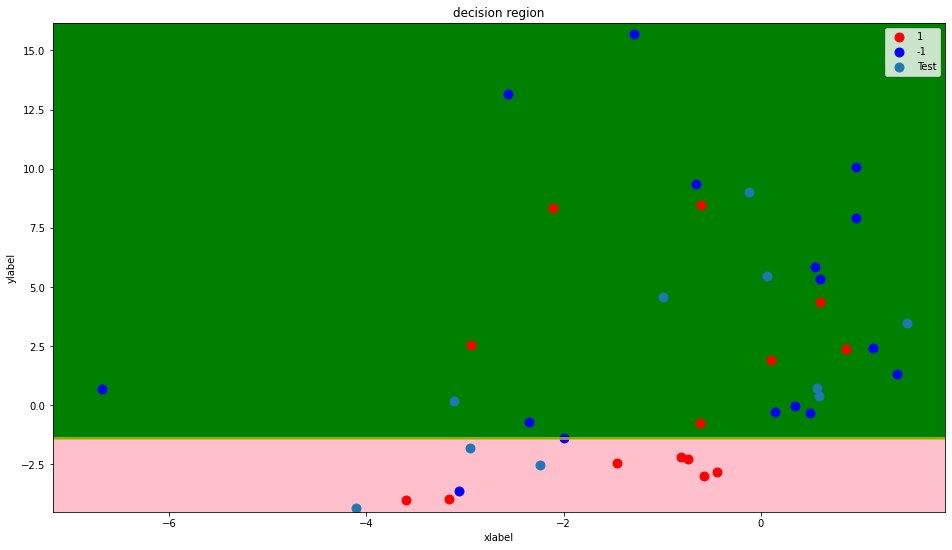

In [14]:
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();

# [Problem 7 and 8]

In [121]:
class DecisionTreeNode():
    """
    Data structure to represent a node in a decision tree
    """
    def __init__(self, verbose=False,max_depth=None):
        self.verbose = verbose
        self.max_depth = max_depth   
    def _tree_contruct(self,X,y,depth=None):
        """
        Determine the split and generate two node left and right
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            self.label = statistics.mode(y)
            return
            
        number_of_features = X.shape[1]
        self.best_gain = 0
        for i in range(number_of_features):
            candidate_threshold = np.unique(X[:,i])
            
            for threshold in candidate_threshold:
                left = y[X[:,i] < threshold]
                right = y[X[:,i] >= threshold]
                
                split_info_gain = self._information_gain(y,left,right)
                
                if split_info_gain > self.best_gain:
                    self.threshold = threshold
                    self.feature_chosen = i
                    self.best_gain = split_info_gain
                    
                    if self.verbose:
                        print("depth: {}, feature: {}, information_gain: {}".format(depth,self.feature_chosen,self.best_gain))
                        
        self.label = None
        self.left_node = DecisionTreeNode(verbose=self.verbose, max_depth=self.max_depth)
        self.left_node._tree_contruct(X=X[X[:,self.feature_chosen] < self.threshold],y=y[X[:,self.feature_chosen] < self.threshold],depth=depth+1)
        self.right_node = DecisionTreeNode(verbose=self.verbose,  max_depth=self.max_depth)
        self.right_node._tree_contruct(X=X[X[:,self.feature_chosen] >= self.threshold],y=y[X[:,self.feature_chosen] >= self.threshold],depth=depth+1)
        
        
    def predict(self, X):
        """
        Estimate the label of a sample by traverse node in a decision tree classifier
        """
        if self.label is None:
            if X[self.feature_chosen] < self.threshold:
                return self.left_node.predict(X)
            else:
                return self.right_node.predict(X)
        else:
            return self.label
        
    def _gini(self,node):
        """
        Function to calculate gini impurity of a node
        Parameters
        -------
        node: nd_array shape(n_smaples,1)
        Output
        --------
        Gini impurity of a node
        """
        samples,counts = np.unique(node, return_counts=True)
        result = 1
        node_count = len(node)
        for count in counts:
            result -= (count / node_count)**2
        return result
    
    def _information_gain(self, parent, left, right):
        """
        Calculate information gain of a specific division using gini impurity
        Parameters
        ---------
        parent, left,right: parent, left, right node of the split, ndarray shape (number_of_samples,1)
        Output
        ---------
        Information gain of the division
        """
        parent_gini = self._gini(parent)
        left_gini = (self._gini(left) * len(left)) / len(parent)
        right_gini = (self._gini(right) * len(right)) / len(parent)
        return parent_gini - left_gini - right_gini
        

In [124]:
class ScratchDecesionTreeClassifier():
    """
    Decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False,max_depth=None):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self.root = DecisionTreeNode(verbose=self.verbose,max_depth=self.max_depth)
        self.root._tree_contruct(X,y,0)
        
        
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        result = np.zeros(len(X))
        for i,sample in enumerate(X):
            result[i] = self.root.predict(sample)
        return result

**Learning and estimation with depth = 2**

In [135]:
model = ScratchDecesionTreeClassifier(verbose=True,max_depth=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

depth: 0, feature: 0, information_gain: 0.01501915708812257
depth: 0, feature: 0, information_gain: 0.020992063492063423
depth: 0, feature: 0, information_gain: 0.03865258924082446
depth: 0, feature: 0, information_gain: 0.06259259259259262
depth: 0, feature: 0, information_gain: 0.09395002658160546
depth: 0, feature: 1, information_gain: 0.12126262626262618
depth: 1, feature: 0, information_gain: 0.004464285714285643
depth: 1, feature: 0, information_gain: 0.01041666666666674
depth: 1, feature: 0, information_gain: 0.052083333333333315
depth: 1, feature: 0, information_gain: 0.009641873278236957
depth: 1, feature: 0, information_gain: 0.011157024793388426
depth: 1, feature: 0, information_gain: 0.037190082644628114
depth: 1, feature: 0, information_gain: 0.04499540863177226
[0. 1. 1. 0. 1. 1. 1. 0. 1. 1.]


In [136]:
evaluate(y_pred,y_test)

accuracy: 0.3
precision: 0.2857142857142857
recall: 0.5
f1: 0.36363636363636365


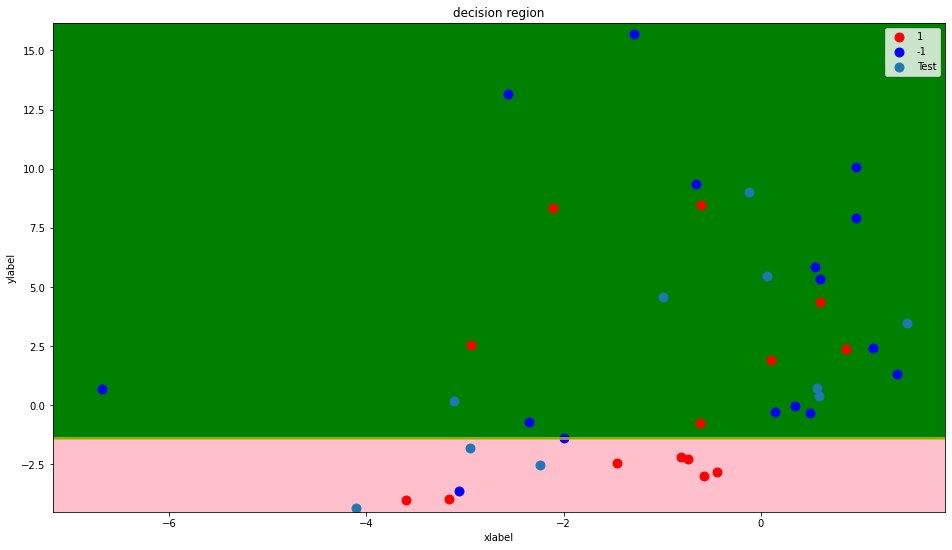

In [137]:
# Decision Tree 
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();

**Learning and Estimation with unlimited depth**

In [140]:
model = ScratchDecesionTreeClassifier(verbose=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

depth: 0, feature: 0, information_gain: 0.01501915708812257
depth: 0, feature: 0, information_gain: 0.020992063492063423
depth: 0, feature: 0, information_gain: 0.03865258924082446
depth: 0, feature: 0, information_gain: 0.06259259259259262
depth: 0, feature: 0, information_gain: 0.09395002658160546
depth: 0, feature: 1, information_gain: 0.12126262626262618
depth: 1, feature: 0, information_gain: 0.004464285714285643
depth: 1, feature: 0, information_gain: 0.01041666666666674
depth: 1, feature: 0, information_gain: 0.052083333333333315
depth: 2, feature: 0, information_gain: 0.11111111111111116
depth: 2, feature: 0, information_gain: 0.4444444444444445
depth: 1, feature: 0, information_gain: 0.009641873278236957
depth: 1, feature: 0, information_gain: 0.011157024793388426
depth: 1, feature: 0, information_gain: 0.037190082644628114
depth: 1, feature: 0, information_gain: 0.04499540863177226
depth: 2, feature: 0, information_gain: 0.017792302106027502
depth: 2, feature: 0, information_

In [141]:
evaluate(y_pred,y_test)

accuracy: 0.3
precision: 0.2857142857142857
recall: 0.5
f1: 0.36363636363636365


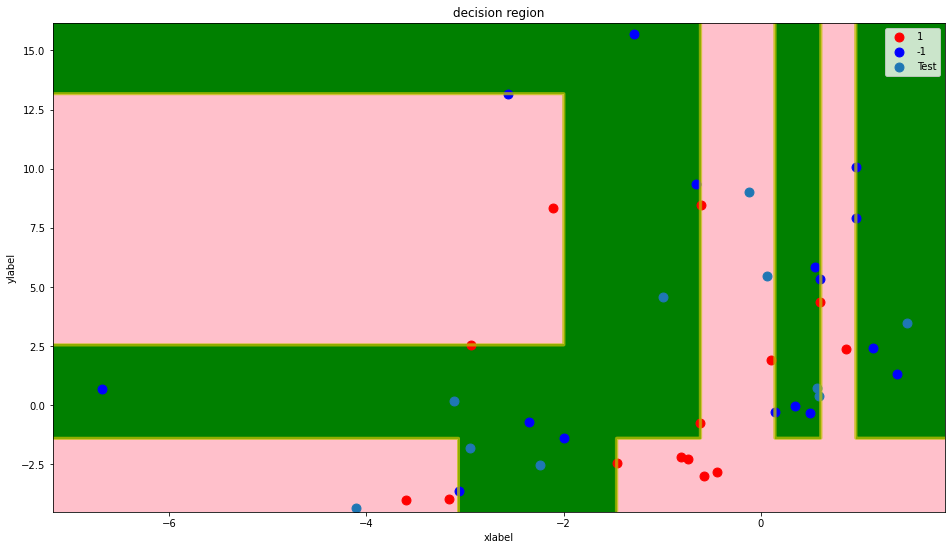

In [142]:
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();